In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("8-fraud_detection.csv")

In [4]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [5]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [6]:
df["is_fraud"].unique()

array([0, 1])

In [7]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [8]:
#imbalanced dataset (dengesiz dataset)

In [9]:
df.isnull().sum()

transaction_amount        0
transaction_risk_score    0
is_fraud                  0
dtype: int64

In [10]:
X=df.drop("is_fraud", axis=1)
y=df["is_fraud"]

<Axes: xlabel='transaction_amount', ylabel='transaction_risk_score'>

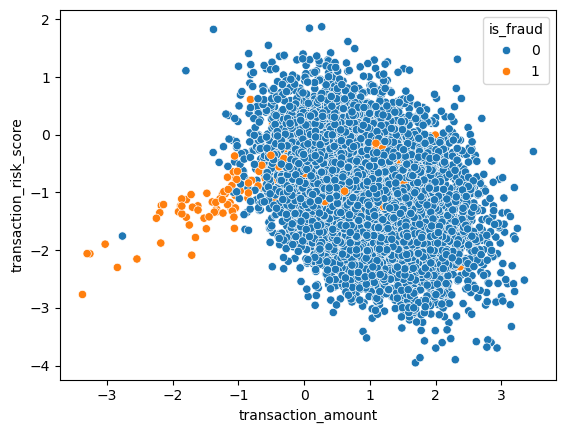

In [11]:
sns.scatterplot(x=X["transaction_amount"], y=X["transaction_risk_score"], hue=y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=15)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
##hyperparameter tuning
model=LogisticRegression()

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
penalty=['l1', 'l2', 'elasticnet'] # Cezalar
c_values=[100,10,1.0,0.1,0.01] # Cezalardaki lambda değerleri
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # Kullanılabilecek algoritmalar
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [17]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [18]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight= class_weight)

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [20]:
cv=StratifiedKFold()

In [21]:
grid=GridSearchCV(estimator=model, param_grid=params,scoring= "accuracy",cv=cv)

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:
y_pred=grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
print("score: ", accuracy_score(y_pred, y_test))
print("classification report:\n", classification_report(y_pred, y_test))
print("confusion matrix:\n " , confusion_matrix(y_pred, y_test))

score:  0.9896
classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2480
           1       0.42      0.80      0.55        20

    accuracy                           0.99      2500
   macro avg       0.71      0.90      0.77      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix:
  [[2458   22]
 [   4   16]]


In [27]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [28]:
grid.best_score_

0.9885333333333334

In [29]:
#ROC , AUC

The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis. • A model that perfectly distinguishes between classes has a curve that reaches the top-left corner. • The closer the curve is to the top-left, the better the model. • The area under the ROC curve (AUC) quantifies this performance: • AUC = 1 → perfect classifier • AUC = 0.5 → random guessing

ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.

In [31]:
model_prob=grid.predict_proba(X_test)
model_prob

array([[0.99641419, 0.00358581],
       [0.85251903, 0.14748097],
       [0.95431376, 0.04568624],
       ...,
       [0.99019702, 0.00980298],
       [0.98567882, 0.01432118],
       [0.99790395, 0.00209605]])

In [32]:
model_prob=model_prob[:,1] ##  probabilities for the positive class
model_prob

array([0.00358581, 0.14748097, 0.04568624, ..., 0.00980298, 0.01432118,
       0.00209605])

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
model_auc= roc_auc_score(y_test, model_prob)
model_auc

0.7380820043610244

In [38]:
#1.model false positive rate
#2.model true positive rate
#3.threshold: eşik değerleri
# roc_curve sonucu bize yukarıdaki 3 tane çıktıyı veriyor
model_fpr, model_tpr, thresholds=roc_curve(y_test, model_prob)

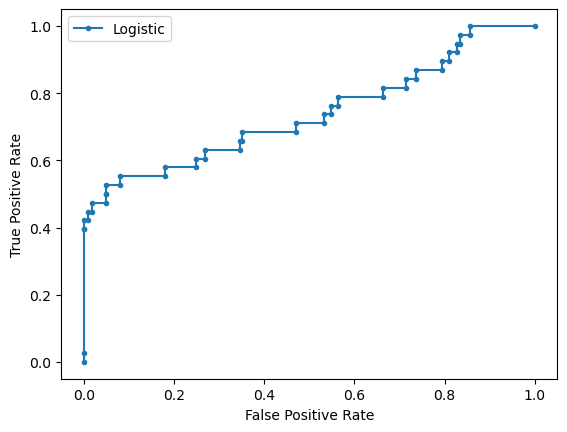

In [40]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

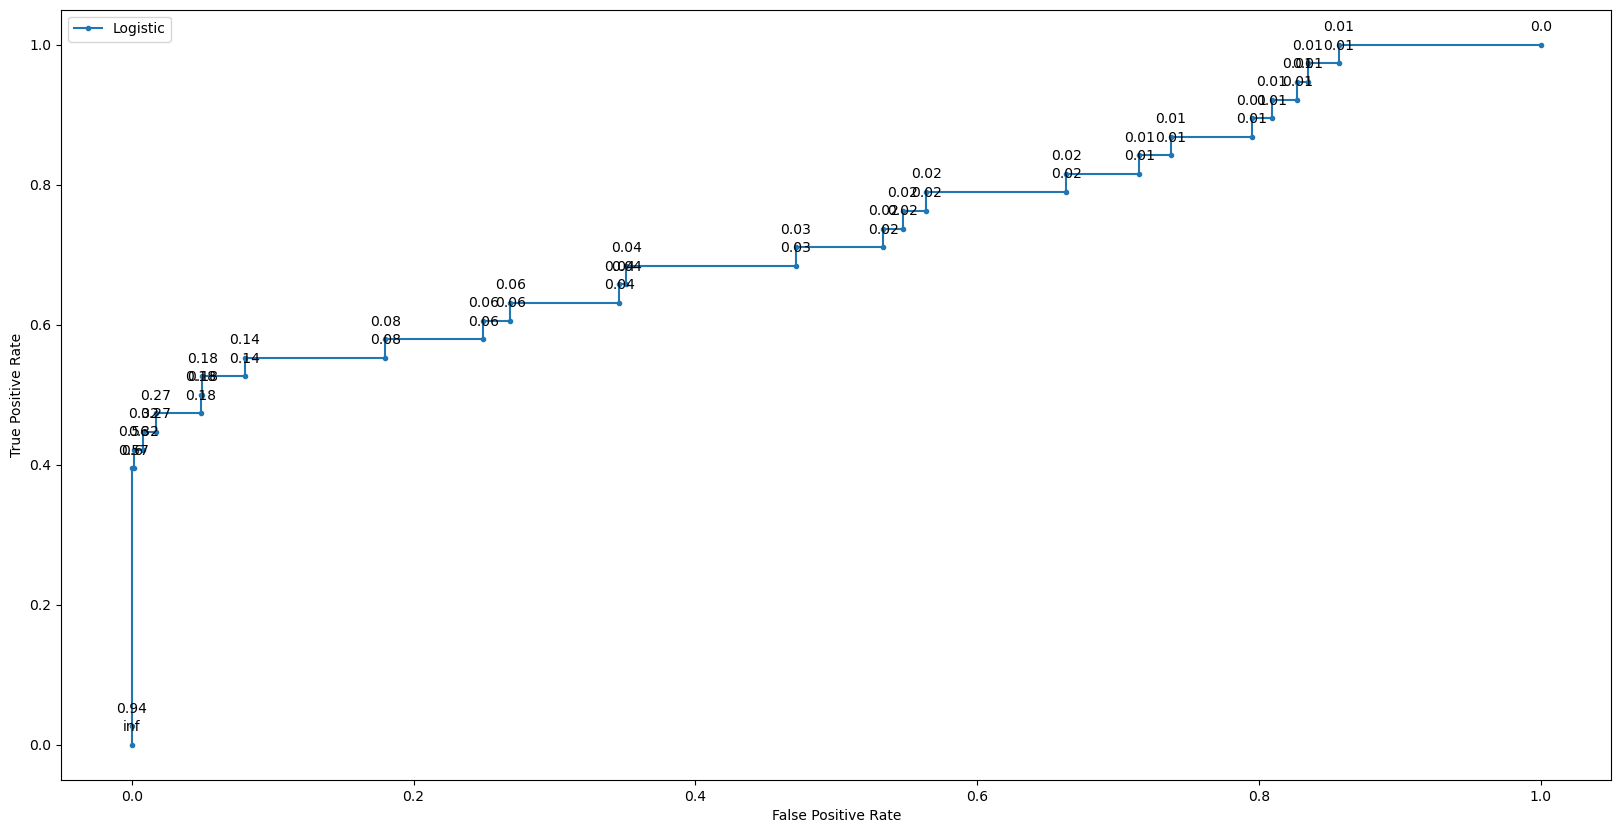

In [48]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))
# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')
# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
# Show the plot
plt.show()

In [52]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.2  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)
print(model_prob >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.2
[[2365   97]
 [  20   18]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2462
           1       0.16      0.47      0.24        38

    accuracy                           0.95      2500
   macro avg       0.57      0.72      0.61      2500
weighted avg       0.98      0.95      0.96      2500



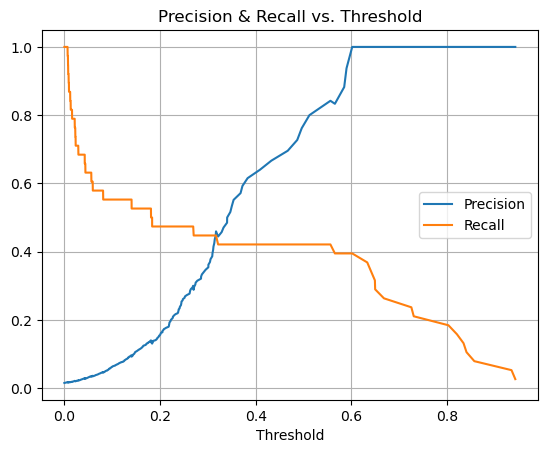

In [54]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()